## DIABETES PREDICTION MODEL 

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [294]:
data = pd.read_csv(r"diabetes.csv")

In [296]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [298]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [300]:
data.shape

(768, 9)

In [302]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [304]:
data.duplicated().sum()

0

#### DATA VISUALISATION

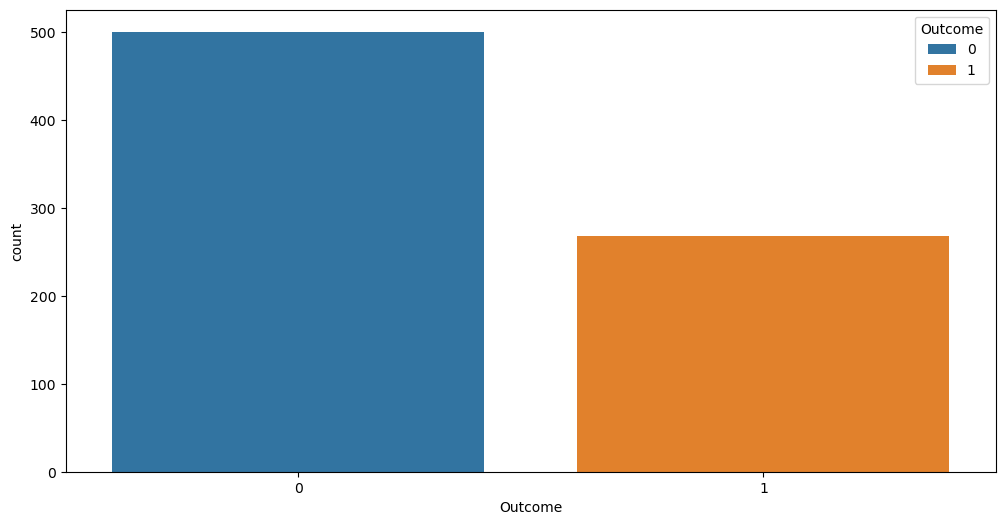

In [307]:
plt.figure( figsize =(12,6))
sns.countplot( x = 'Outcome' , data = data , hue = 'Outcome' )
plt.show()

#### OBSERVING OUTLIERS

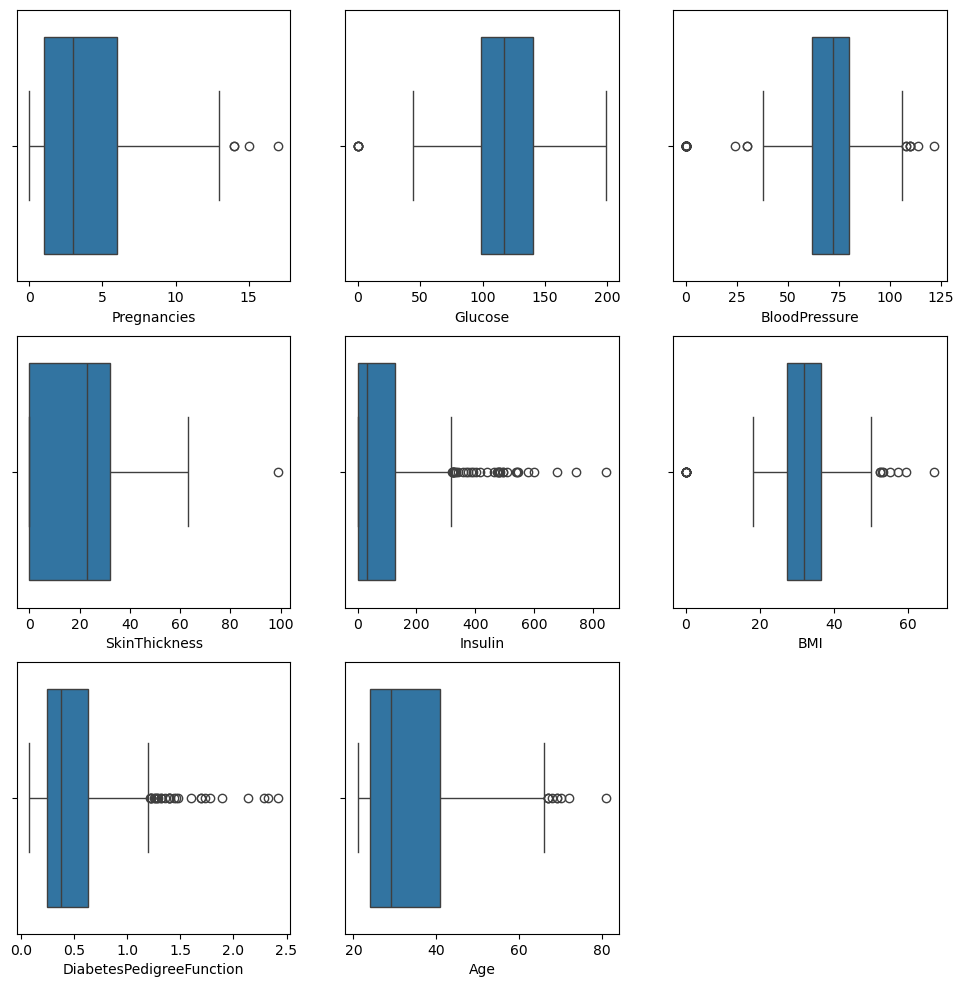

In [310]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies' , 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age' ]):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= col, data = data)
plt.show()

##### REMOVING OUTLIERS

In [313]:
data1 = data[(data['Pregnancies']<13) & (data['Glucose']<180) & (data['Glucose']>49) & (data['BloodPressure']<102) & (data['BloodPressure']>42) & (data['Insulin']<310) & (data['BMI']>21) & (data['BMI']<49) & (data['DiabetesPedigreeFunction']<1.05) & (data['Age']<62)]


In [315]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


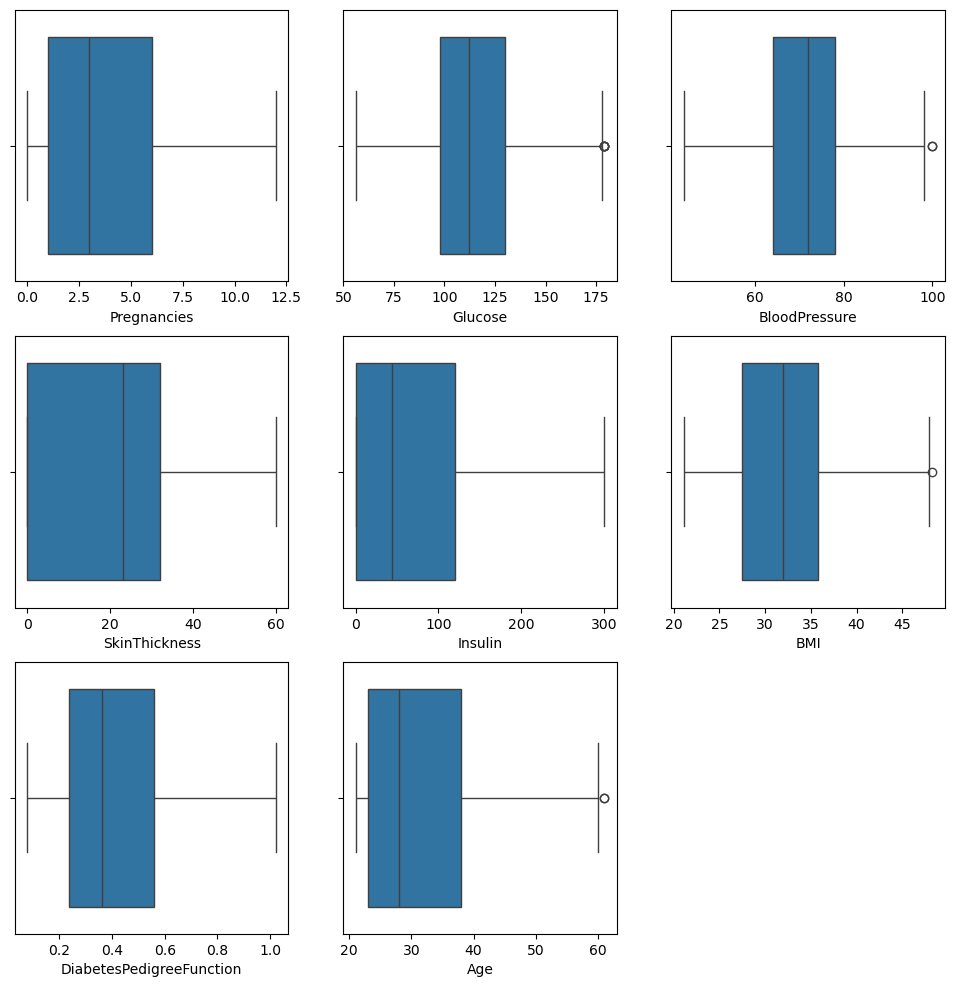

In [317]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies' , 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age' ]):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= col, data = data1)
plt.show()

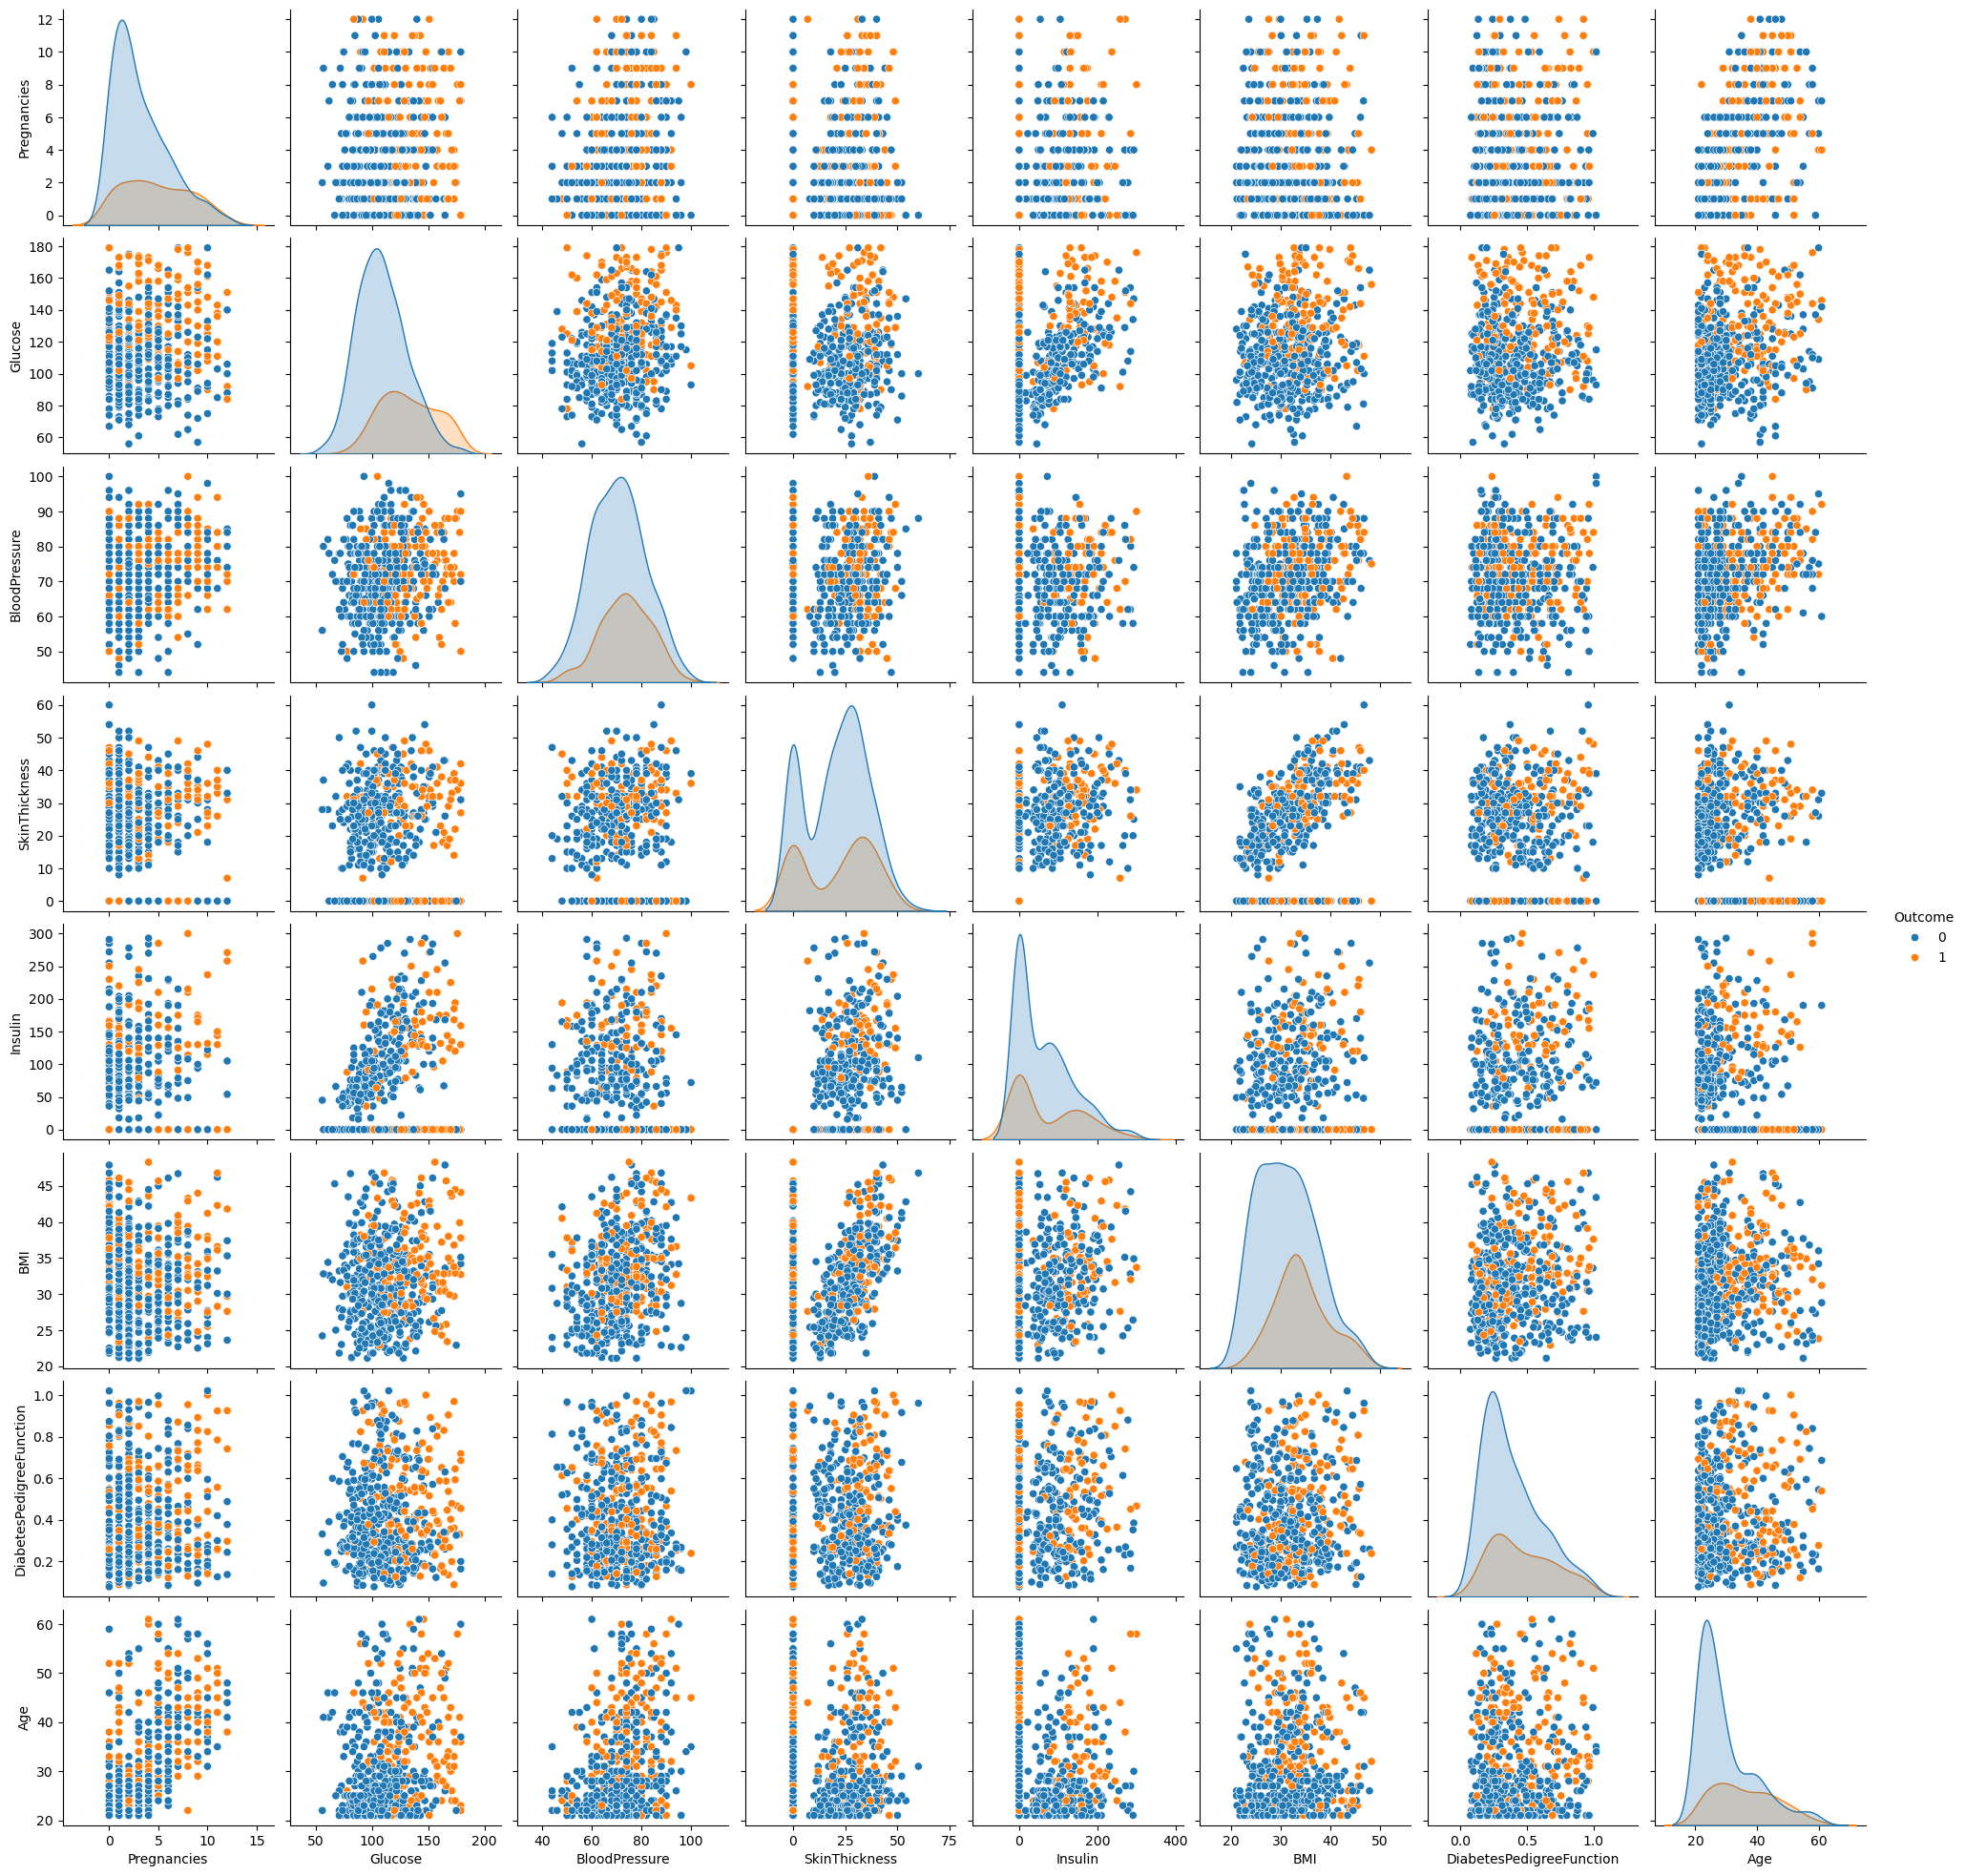

In [319]:
sns.pairplot( hue = 'Outcome' ,  data = data1 )
plt.show()

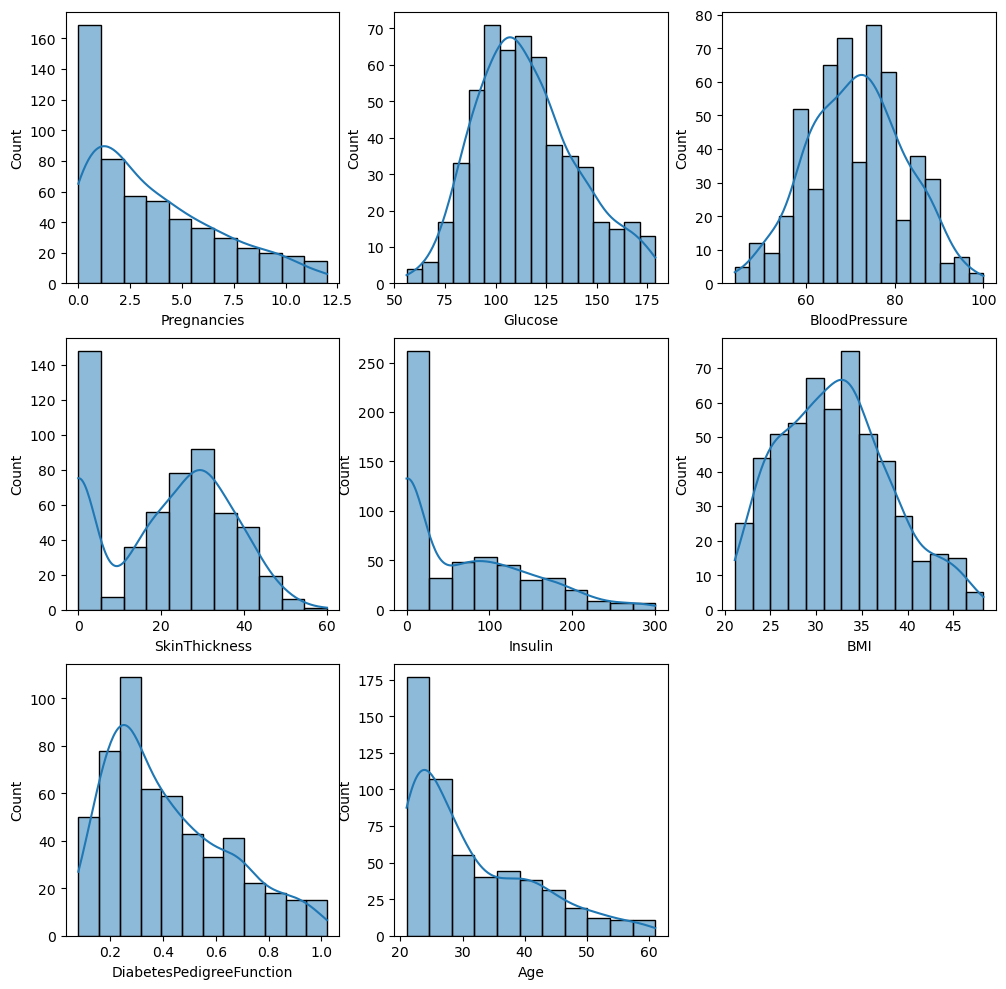

In [320]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies' , 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age' ]):
    plt.subplot(3,3,i+1)
    sns.histplot(x= col , data = data1 , kde = True )
plt.show()

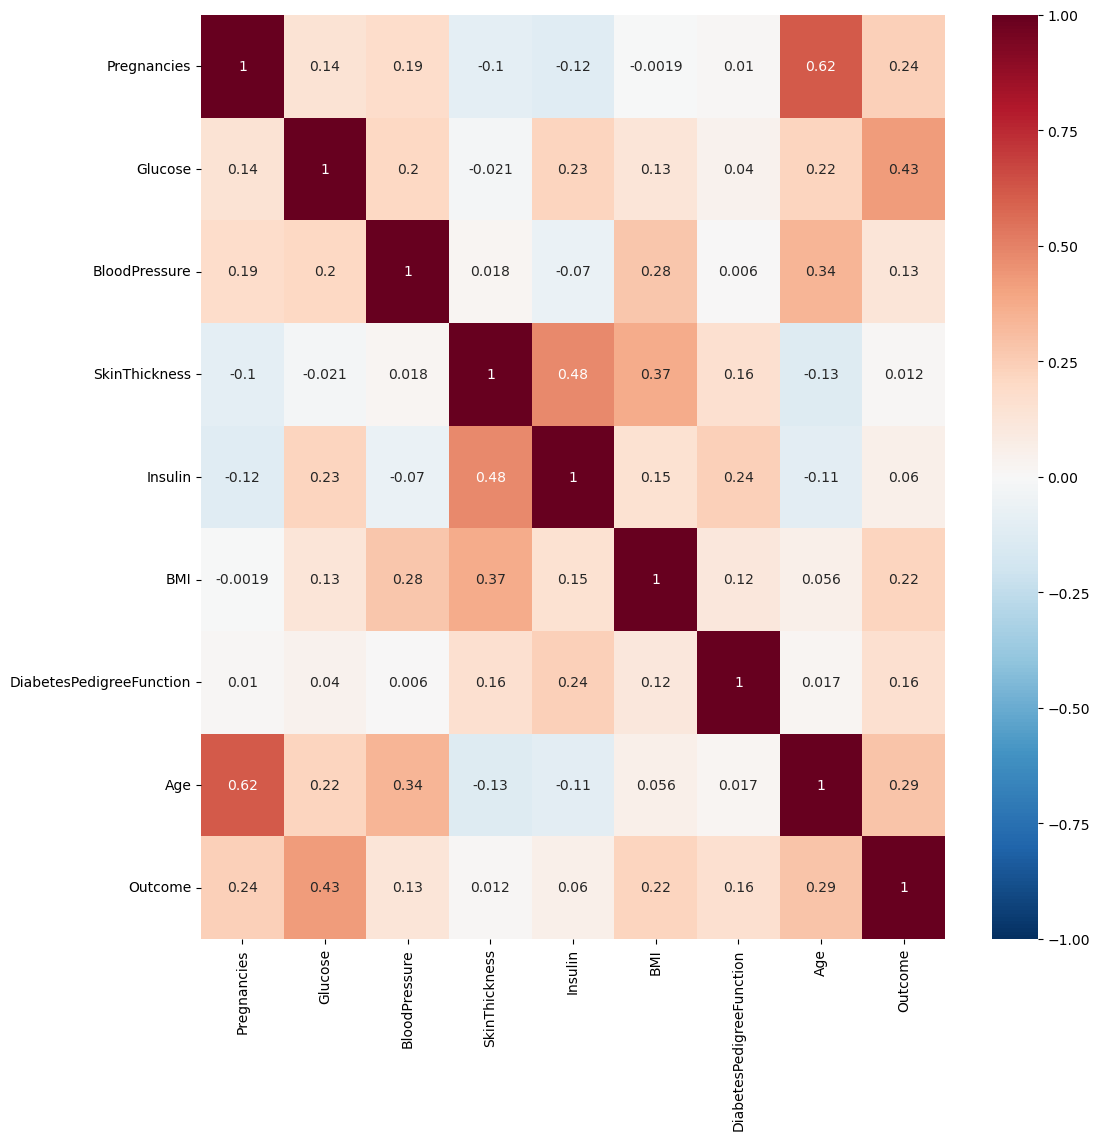

In [321]:
plt.figure(figsize = (12,12))
sns.heatmap( data1.corr() ,  vmin = -1.0 , center = 0 , cmap = 'RdBu_r' , annot = True )
plt.show()

#### STANDARD SCALING AND LABEL ENCODING

In [326]:
x = data1.drop(['Outcome'] , axis = 1)
y = data1['Outcome']

In [328]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state = 0 , stratify = y) 

In [330]:
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[-0.53463074, -1.58949416, -0.70400063, ..., -0.41366877,
        -0.19065655,  0.13913873],
       [ 0.74848304,  1.45816699,  0.57412713, ...,  2.34341704,
         0.7126825 , -0.4713625 ],
       [ 2.03159683,  0.3394053 , -0.15623159, ..., -0.17830779,
        -0.93220352,  0.95314038],
       ...,
       [-1.17618764, -1.24229226, -0.70400063, ...,  0.61183266,
         0.59583267, -1.08186373],
       [-1.17618764,  1.34243303,  1.6696652 , ...,  1.67095709,
        -0.18616232, -1.08186373],
       [-0.2138523 , -0.39357649, -1.61694902, ..., -0.21193078,
        -0.54120602, -0.77661312]])

#### FINDING THE BEST MODEL THROUGH HYPERPARAMETER TUNING

In [333]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [335]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma = 'auto'),
        'params' : {
            'C' : [1,10,20] ,
            'kernel' : ['rbf' , 'linear']
        }

    },
    'LogisticRegression' : {
        'model' : LogisticRegression(solver = 'liblinear' , multi_class = 'auto' ),
        'params' : {
            'C' : [1,20,50]
        }
    },
    'Kneighbors_classifier' : {
        'model' : KNeighborsClassifier(),
        'params' : {
           'n_neighbors' : [1,10,15,20,25,30]
        }
    }
}            

In [337]:
scores =[]

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'] , mp['params'] , cv=5 , return_train_score = False)
    clf.fit(x_train,y_train)
    scores.append({
        'model' : model_name ,
        'best_score' : clf.best_score_ ,
        'best_params' : clf.best_params_
    })
  

In [338]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.776897,"{'C': 1, 'kernel': 'linear'}"
1,LogisticRegression,0.763739,{'C': 50}
2,Kneighbors_classifier,0.766405,{'n_neighbors': 25}


In [341]:
model = svm.SVC(gamma = 'auto' , C = 1 , kernel = 'linear')
model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [343]:
y_pred = model.predict(x_test)

#### ACCURACY OF THE MODEL

In [346]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_pred)

array([[114,   4],
       [ 29,  17]], dtype=int64)

In [348]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       118
           1       0.81      0.37      0.51        46

    accuracy                           0.80       164
   macro avg       0.80      0.67      0.69       164
weighted avg       0.80      0.80      0.77       164



In [350]:
import pickle
with open('diab_pred.pkl' , 'wb') as f:
    pickle.dump(model,f)